In [61]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [63]:
data = np.array([1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29])

In [65]:
sample_mean = np.mean(data)
sample_std_dev = np.std(data, ddof=1)
n = len(data)

In [67]:
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std_dev:.4f}")
print(f"Sample Size (n): {n}")

Sample Mean: 1.2387
Sample Standard Deviation: 0.1932
Sample Size (n): 15


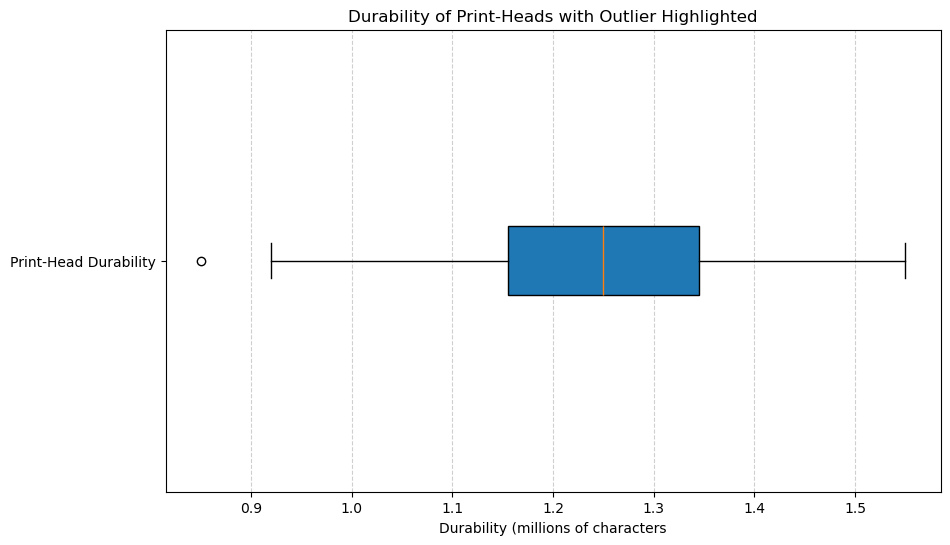

In [69]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, patch_artist=True)
plt.title('Durability of Print-Heads with Outlier Highlighted')
plt.xlabel('Durability (millions of characters')
plt.yticks([1], ['Print-Head Durability'])
plt.grid(axis='x', linestyle='--', alpha=0.6)

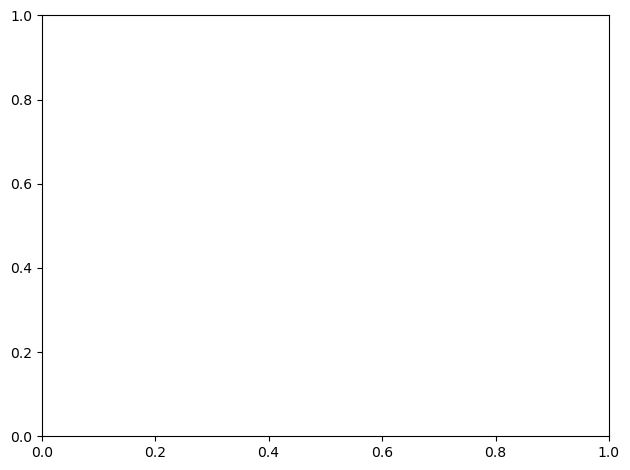

In [70]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

if len(outliers) > 0:
    for outlier in outliers:
        plt.annotate(
            f'{outlier:.2f}',
            xy=(outlier, 1.05),
            xycoords='data',
            ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc='yellow', ec='black', lw=1, alpha=0.8)
        )

plt.tight_layout()
plt.show()

In [73]:
degrees_of_freedom = n - 1

In [75]:
confidence_interval_t = stats.t.interval(
    confidence=0.99,
    df=degrees_of_freedom,
    loc=sample_mean,
    scale=stats.sem(data)
)

In [77]:
print(f"Degrees of Freedom (df): {degrees_of_freedom}")
print(f"99% Confidence Interval (t-distribution): ({confidence_interval_t[0]:.4f}, {confidence_interval_t[1]:.4f})")

Degrees of Freedom (df): 14
99% Confidence Interval (t-distribution): (1.0902, 1.3871)


In [79]:
known_population_std_dev = 0.2

In [81]:
standard_error_z = known_population_std_dev / np.sqrt(n)

In [83]:
confidence_interval_z = stats.norm.interval(
    confidence=0.99,
    loc=sample_mean,
    scale=standard_error_z
)

In [57]:
print(f"Known Population Standard Deviation: {known_population_std_dev}")
print(f"99% Confidence Interval (Z-distribution): ({confidence_interval_z[0]:.4f}, {confidence_interval_z[1]:.4f})")

Known Population Standard Deviation: 0.2
99% Confidence Interval (Z-distribution): (1.1057, 1.3717)
